In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [2]:
# set options
pd.set_option('display.max_columns', 61)
pd.set_option('display.max_rows', 61)

In [3]:
# read data
data = pd.read_csv('data/survey_results_public.csv', index_col='Respondent', na_values = ['no info', '.', 'NA', 'Missing'])
questions = pd.read_csv('data/survey_results_schema.csv', index_col='Column') 

In [4]:
# survey questions
questions.head()

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...


In [5]:
# survey responses
data.head(3)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [6]:
# create a subset
data = data[['MainBranch', 'Age', 'ConvertedComp', 'DevType', 'Employment',
             'JobFactors', 'JobSat', 'JobSeek', 'NEWJobHunt', 'NEWJobHuntResearch',
             'NEWLearn', 'NEWOnboardGood', 'NEWOvertime', 'PurchaseWhat',
             'UndergradMajor', 'WorkWeekHrs', 'YearsCodePro']] 

In [7]:
data.dtypes

MainBranch             object
Age                   float64
ConvertedComp         float64
DevType                object
Employment             object
JobFactors             object
JobSat                 object
JobSeek                object
NEWJobHunt             object
NEWJobHuntResearch     object
NEWLearn               object
NEWOnboardGood         object
NEWOvertime            object
PurchaseWhat           object
UndergradMajor         object
WorkWeekHrs           float64
YearsCodePro           object
dtype: object

In [8]:
# convert to numeric
data['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}, inplace=True)
data.dropna(subset=['YearsCodePro'], inplace=True)
data['YearsCodePro'] = data['YearsCodePro'].astype(int)

In [9]:
# rename column
data.rename(columns={'ConvertedComp': 'AnnualSalaryUSD'}, inplace=True)

In [10]:
# create satisfaction score column
data['JobSat_Score'] = data['JobSat'].replace({'Very dissatisfied': 1, 'Slightly dissatisfied': 2,
                                               'Neither satisfied nor dissatisfied': 3,
                                               'Slightly satisfied': 4, 'Very satisfied': 5})

In [11]:
# statistics
data.describe()

,Age,AnnualSalaryUSD,WorkWeekHrs,YearsCodePro,JobSat_Score
count,36852.000000,3.462100e+04,40922.000000,46349.000000,44773.000000
mean,32.269242,1.037684e+05,40.788262,8.491812,3.632301
std,8.855902,2.266323e+05,17.845422,7.905296,1.300214
min,1.000000,0.000000e+00,1.000000,0.000000,1.000000
25%,26.000000,2.466000e+04,40.000000,3.000000,3.000000
50%,30.000000,5.404900e+04,40.000000,6.000000,4.000000
75%,37.000000,9.500000e+04,44.000000,12.000000,5.000000
max,279.000000,2.000000e+06,475.000000,51.000000,5.000000


In [12]:
# age filter (remove outliers)  
data = data.query("Age >= 14 & Age < 100") 

In [13]:
# limit max hours/week (remove outliers)  
data = data[(data['WorkWeekHrs'] < 168)]

In [14]:
# filter data 
data = data[data['MainBranch'] == 'I am a developer by profession']
data.shape[0]

31720

In [15]:
# check for nulls
data.isnull().sum()

MainBranch               0
Age                      0
AnnualSalaryUSD       4456
DevType                175
Employment              41
JobFactors             694
JobSat                  45
JobSeek                  0
NEWJobHunt            1302
NEWJobHuntResearch    2021
NEWLearn               880
NEWOnboardGood         419
NEWOvertime            132
PurchaseWhat          3253
UndergradMajor        2282
WorkWeekHrs              0
YearsCodePro             0
JobSat_Score            45
dtype: int64

In [16]:
data.dropna(subset=['Employment', 'JobSat'], inplace=True)
data.shape[0]

31636

---

### **Employment & Satisfaction**

In [17]:
def normalize_plot(feature):
    feat = data[feature].value_counts(normalize=True)
    plt.figure(figsize=(8, 4))
    sns.barplot(feat.values, feat.index, palette="viridis")
    plt.title(textwrap.fill(questions.loc[feature, 'QuestionText'], width=80))
    return plt.show()

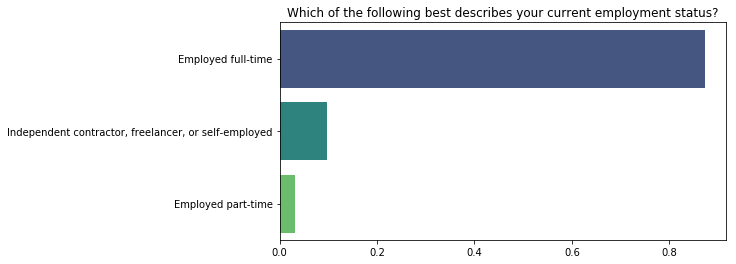

In [18]:
normalize_plot('Employment')

In [19]:
data['Employment'].value_counts(normalize=True)

Employed full-time                                      0.873088
Independent contractor, freelancer, or self-employed    0.096219
Employed part-time                                      0.030693
Name: Employment, dtype: float64

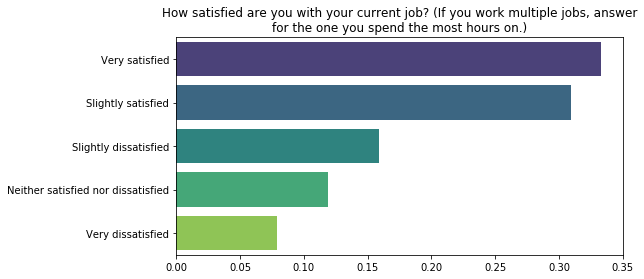

In [20]:
normalize_plot('JobSat')

In [21]:
data['JobSat'].value_counts(normalize=True)

Very satisfied                        0.333323
Slightly satisfied                    0.309141
Slightly dissatisfied                 0.159249
Neither satisfied nor dissatisfied    0.118978
Very dissatisfied                     0.079308
Name: JobSat, dtype: float64

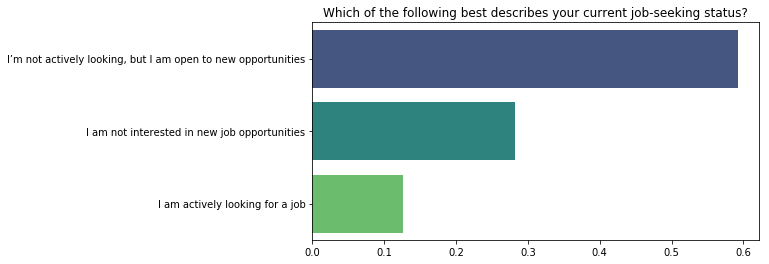

In [22]:
normalize_plot('JobSeek')

In [23]:
data['JobSeek'].value_counts(normalize=True)

I’m not actively looking, but I am open to new opportunities    0.591952
I am not interested in new job opportunities                    0.282305
I am actively looking for a job                                 0.125743
Name: JobSeek, dtype: float64

---

### **Important Job Factors**

In [24]:
def split_plot(feature):
    ''' Split options (select all that apply) and plot'''
    feat = data[feature].str.get_dummies(';').sum().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(feat.values, feat.index, palette="viridis")
    plt.title(textwrap.fill(questions.loc[feature, 'QuestionText'], width=80))
    return plt.show()

* **Most important factors**

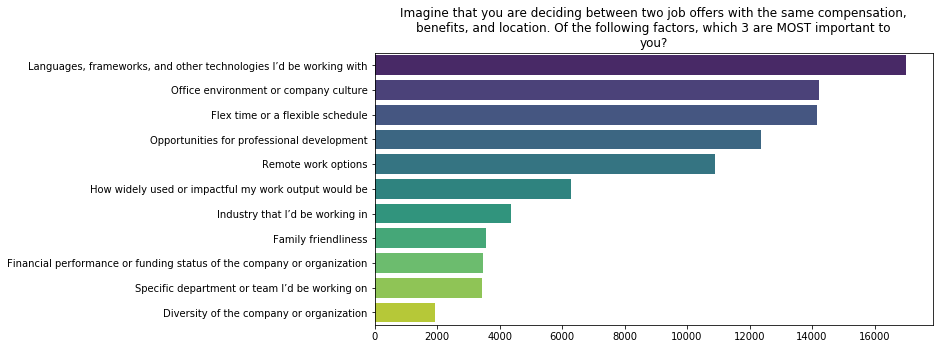

In [25]:
split_plot('JobFactors')

* **Other factors (current job)**

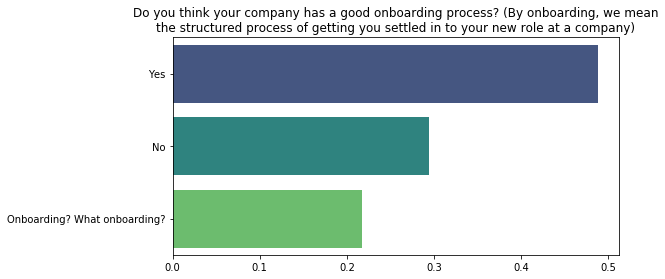

In [26]:
normalize_plot('NEWOnboardGood')

In [27]:
data.groupby('NEWOnboardGood')['JobSat_Score'].mean().sort_values(ascending=False)

NEWOnboardGood
Yes                             3.940787
Onboarding? What onboarding?    3.469008
No                              3.326961
Name: JobSat_Score, dtype: float64

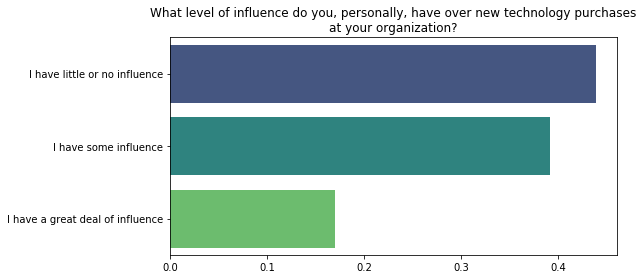

In [28]:
normalize_plot('PurchaseWhat')

In [29]:
data.groupby('PurchaseWhat')['JobSat_Score'].mean().sort_values(ascending=False)

PurchaseWhat
I have a great deal of influence    3.822323
I have some influence               3.734310
I have little or no influence       3.514299
Name: JobSat_Score, dtype: float64

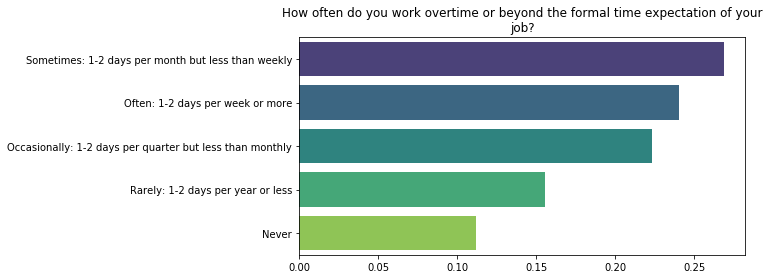

In [30]:
normalize_plot('NEWOvertime')

In [31]:
data.groupby('NEWOvertime')['JobSat_Score'].mean().sort_values(ascending=False)

NEWOvertime
Sometimes: 1-2 days per month but less than weekly          3.716022
Occasionally: 1-2 days per quarter but less than monthly    3.703514
Rarely: 1-2 days per year or less                           3.651286
Often: 1-2 days per week or more                            3.605222
Never                                                       3.554956
Name: JobSat_Score, dtype: float64

* **Salary**

In [32]:
salary = data[['AnnualSalaryUSD', 'JobSat_Score']]
salary.replace(0, np.nan, inplace=True)
salary.dropna(inplace=True)
salary.shape[0]

27149

In [33]:
# outliers
print('Salaries lower than: USD', data['AnnualSalaryUSD'].quantile(0.05)) # 5% lower wages
print('Salaries than: USD', data['AnnualSalaryUSD'].quantile(0.95)) # 5% higher wages

Salaries lower than: USD 5820.0
Salaries than: USD 250000.0


In [34]:
# remove outliers
salary = salary.query("AnnualSalaryUSD >= 5773 & AnnualSalaryUSD <= 250000") 

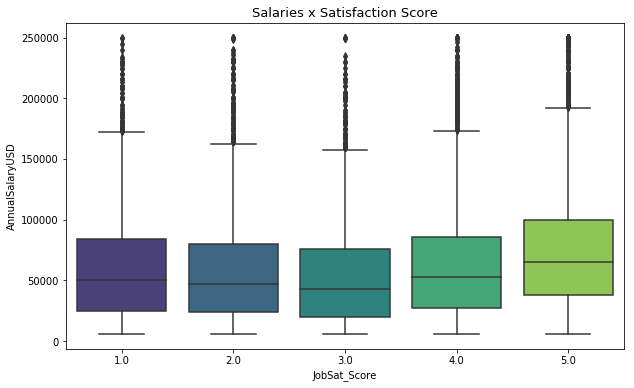

In [48]:
# plot 
plt.figure(figsize=(10, 6))
sns.boxplot(x="JobSat_Score", y="AnnualSalaryUSD",
            data=salary, palette="viridis");
plt.title('Salaries x Satisfaction Score', fontsize=13)
plt.show()

---

### **Job Satisfaction X Job Seek**

In [36]:
# JobSat x JobSeek
data.groupby('JobSat')['JobSeek'].value_counts(normalize=True)

JobSat                              JobSeek                                                     
Neither satisfied nor dissatisfied  I’m not actively looking, but I am open to new opportunities    0.711211
                                    I am actively looking for a job                                 0.191552
                                    I am not interested in new job opportunities                    0.097237
Slightly dissatisfied               I’m not actively looking, but I am open to new opportunities    0.673879
                                    I am actively looking for a job                                 0.252680
                                    I am not interested in new job opportunities                    0.073442
Slightly satisfied                  I’m not actively looking, but I am open to new opportunities    0.706953
                                    I am not interested in new job opportunities                    0.207566
                               

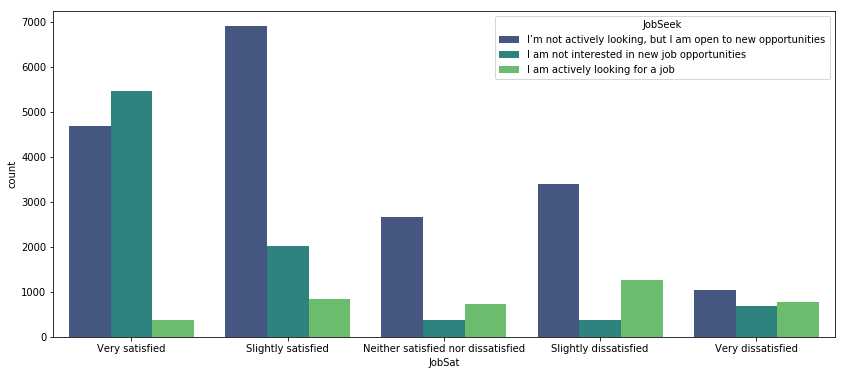

In [37]:
# order values 
order = ['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied',
         'Slightly dissatisfied', 'Very dissatisfied']
hue_order = ["I’m not actively looking, but I am open to new opportunities",
             'I am not interested in new job opportunities', 'I am actively looking for a job']

# plot 
plt.figure(figsize=(14, 6))
sns.countplot(x="JobSat", hue="JobSeek", data=data, order=order, hue_order=hue_order, palette="viridis")
plt.show()

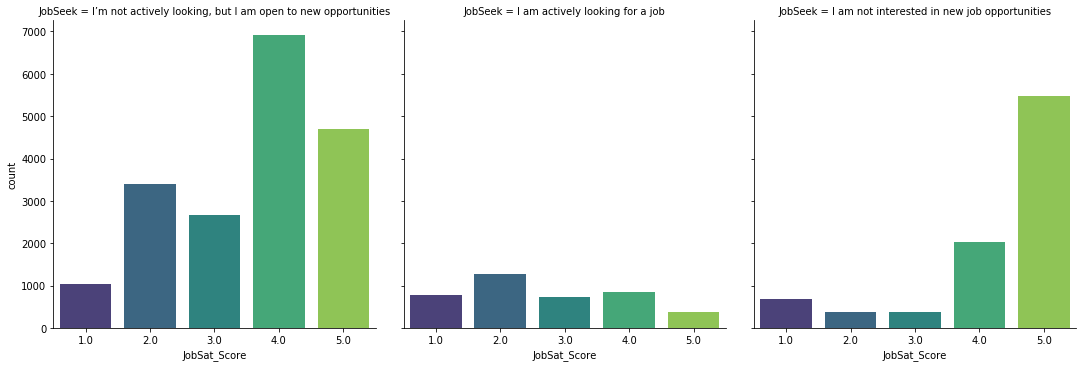

In [38]:
# JobSeek x Satisfaction scores
g = sns.catplot(x="JobSat_Score", col="JobSeek", data=data,
                kind="count", palette="viridis")

In [39]:
## Job seek x Mean satisfaction score
data.groupby('JobSeek')['JobSat_Score'].mean()

JobSeek
I am actively looking for a job                                 2.682001
I am not interested in new job opportunities                    4.260105
I’m not actively looking, but I am open to new opportunities    3.578042
Name: JobSat_Score, dtype: float64

---

### Job Hunting



* **How do developers learn more about a company?**


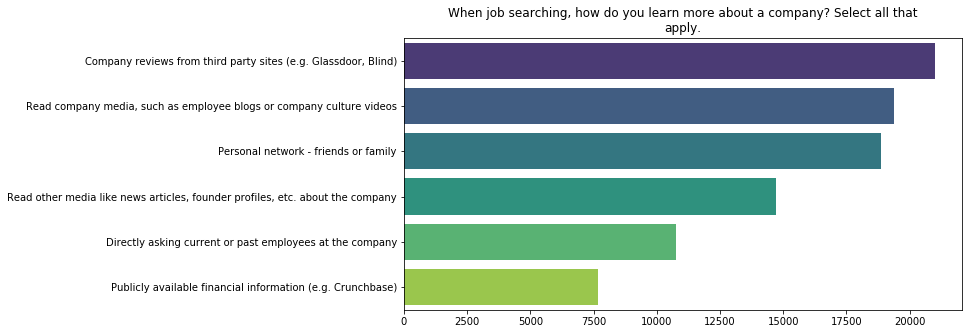

In [40]:
split_plot('NEWJobHuntResearch')

* **What drives them to look for a new job?**

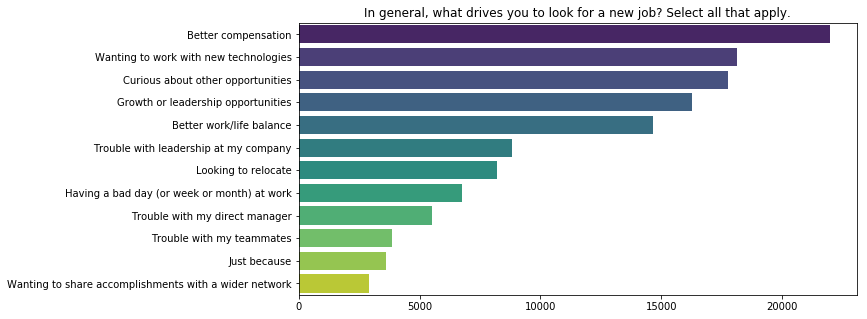

In [41]:
split_plot('NEWJobHunt')

* **Satisfaction x Job seek reasons**

In [42]:
def clean_df(df, feature):
    ''' Splits the answer options and creates a
        new df with the percentage of options '''
    
    feature_df = df[feature].str.get_dummies(';').sum().reset_index()
    feature_df.rename(columns={'index': 'Factors', 0: 'Count'}, inplace=True)
    feature_df.set_index('Factors', inplace=True)
    props_feature_df = feature_df/feature_df.sum()
    
    return props_feature_df

In [43]:
# satisfaction subsets 
satisfied = data[data['JobSat_Score'] > 3] # 'Very satisfied' or 'Slightly satisfied'
dissatisfied = data[data['JobSat_Score'] < 3] # 'Very dissatisfied' or 'Slightly dissatisfied'

In [44]:
# clean df
satisfied_perc = clean_df(satisfied, 'NEWJobHunt')
dissatisfied_perc = clean_df(dissatisfied, 'NEWJobHunt')

In [45]:
# compares factors considering satisfaction 
comp_df = pd.merge(satisfied_perc, dissatisfied_perc, left_index=True, right_index=True)
comp_df.columns = ['satisfied_perc', 'dissatisfied_perc']
comp_df['Diff_Satisfaction_Vals'] = comp_df['satisfied_perc'] - comp_df['dissatisfied_perc']
comp_df.style.bar(subset=['Diff_Satisfaction_Vals'], align='mid', color=['#e55d5d', '#5fbe65'])

,satisfied_perc,dissatisfied_perc,Diff_Satisfaction_Vals
Factors,,,
Better compensation,0.173220,0.165888,0.007332
Better work/life balance,0.113174,0.110974,0.002201
Curious about other opportunities,0.144219,0.126442,0.017777
Growth or leadership opportunities,0.128578,0.123070,0.005508
Having a bad day (or week or month) at work,0.044903,0.067908,-0.023005
Just because,0.030683,0.021687,0.008996
Looking to relocate,0.066377,0.057637,0.008740
Trouble with leadership at my company,0.064208,0.083068,-0.018860
Trouble with my direct manager,0.043046,0.046221,-0.003175


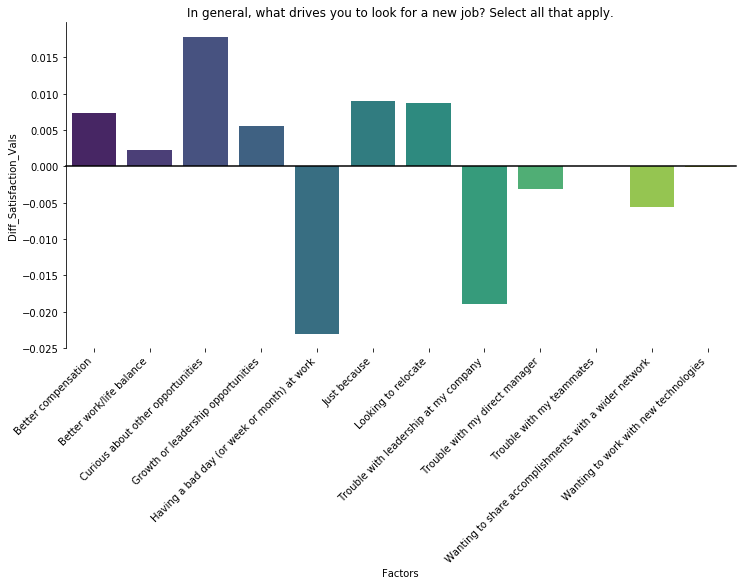

In [46]:
comp_df2 = comp_df.reset_index()

# plot 
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=comp_df2['Factors'], y=comp_df2['Diff_Satisfaction_Vals'], palette="viridis")
plt.title(textwrap.fill(questions.loc['NEWJobHunt', 'QuestionText'], width=100))
plt.xticks(rotation=45, horizontalalignment='right')
ax.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)


---

In [47]:
#author: @priscillapreks
#date: apr/2021